# DECISION TREE:


# 1 Data Preparation

In [1]:
import pandas as pd
import numpy as py

## Load the Data

In [2]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(999, 13)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display column names

In [9]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


## 2. Exploratory Data Analysis (EDA):

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Check the missing values

In [15]:
df.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [17]:
duplicates = df.duplicated().sum()
duplicates

np.int64(90)

In [18]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### Plot the distribution of each numerical feature

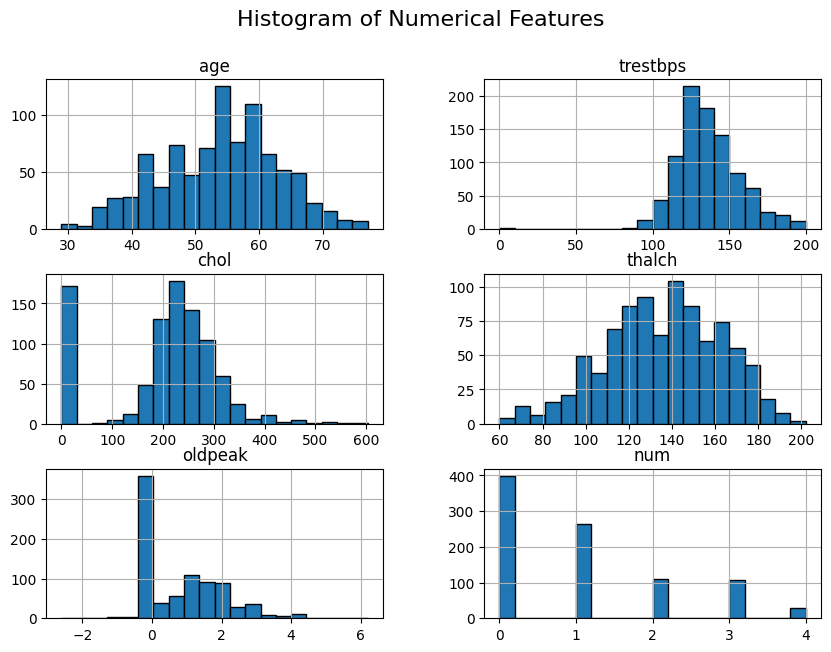

In [20]:
df.hist(figsize=(10, 7), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

### Boxplots to detect outliers

In [22]:
import numpy as np

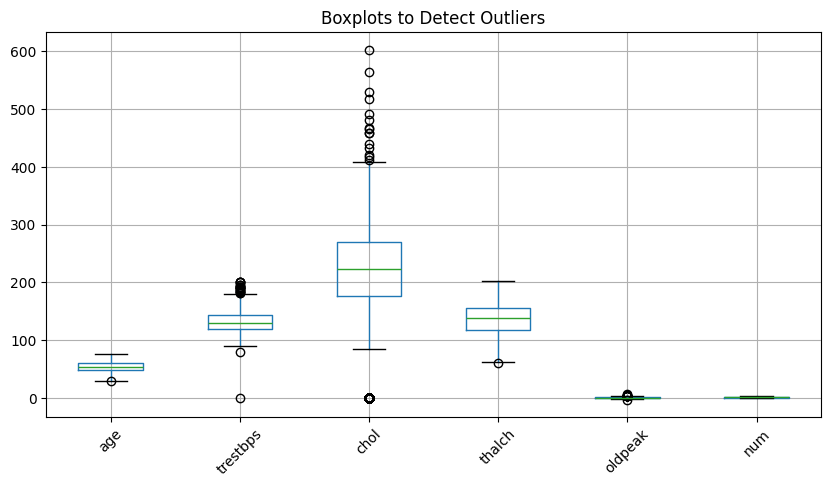

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 5))
df[numeric_cols].boxplot()
plt.title("Boxplots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

### Select only numeric columns

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,age,trestbps,chol,thalch,oldpeak,num
0,63.0,145.0,233.0,150.0,2.3,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0
...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN


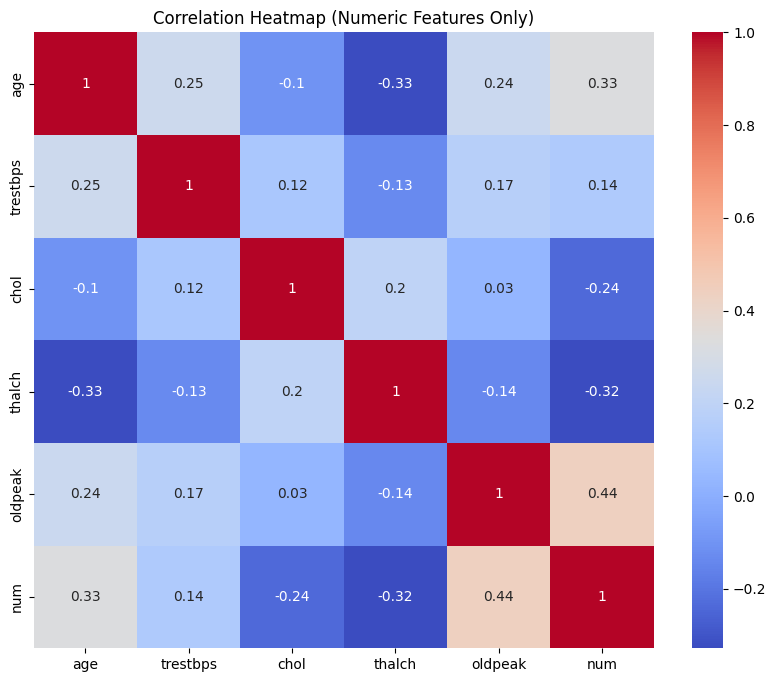

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

### 3. Feature Engineering:

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Check the missing the values again

In [29]:
df.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

#### (Optional) Handle missing values — if any exist

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
## missing values after hanld

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Identify categorical and numerical columns

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

In [35]:
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [36]:
num_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

### Encode categorical variables

In [39]:
if len(cat_cols) > 0:
    print("\nEncoding categorical columns using Label Encoding...")
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    print("Categorical variables encoded successfully!")


Encoding categorical columns using Label Encoding...
Categorical variables encoded successfully!


### Scale numerical features

In [41]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\n Numerical features scaled successfully!")


 Numerical features scaled successfully!


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.053038,1,3,0.610437,0.275348,True,0,0.542393,0,1.445746,0,0,-0.924379
1,-1.468059,1,1,0.096682,-0.005005,False,1,-0.162173,0,-0.818356,1,0,-0.924379
2,0.365466,1,0,0.353560,-0.107801,False,1,0.464108,0,-0.424599,1,0,-0.924379
3,-0.207510,1,3,-0.776700,-0.163871,False,0,2.108096,0,-0.818356,1,0,-0.924379
4,0.365466,1,0,-1.187703,-0.023695,False,1,-0.397029,1,0.658232,1,0,-0.924379


In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

### Define features (X) and target (y)

In [46]:
X = df.drop('num', axis=1)
y = df['num']

print(" Features (X) and Target (y) defined successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


 Features (X) and Target (y) defined successfully!
X shape: (999, 12)
y shape: (999,)


### Separate features (X) and target (y)

In [48]:
if 'target' in df.columns:
    X = df.drop('target', axis=1)
    y = df['target']
    print("\n Features and target separated.")
    print("X shape:", X.shape)
    print("y shape:", y.shape)
else:
    print("\n 'target' column not found. Please check the dataset.")


 'target' column not found. Please check the dataset.


## 4. Decision Tree Classification:

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Split the dataset (80% train, 20% test)

In [51]:
X = df.drop('num', axis=1)
y = df['num']

### Split the dataset into training and testing sets (80-20 split)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(799, 12)

In [55]:
X_test.shape

(200, 12)

### Convert target variable to binary classes

In [57]:
y = np.where(df['num'] > 0, 1, 0)

In [58]:
np.unique(y)

array([0, 1])

In [59]:
X = df.drop('num', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


###  Make predictions

In [61]:
y_pred = dt_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

###  Evaluate model performance

In [62]:
print("\n Model Evaluation Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred), 4))


 Model Evaluation Metrics:
Accuracy: 0.74
Precision: 0.4898
Recall: 0.4706
F1 Score: 0.48
ROC AUC: 0.6514


###  Classification Report

In [63]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.83       149\n           1       0.49      0.47      0.48        51\n\n    accuracy                           0.74       200\n   macro avg       0.66      0.65      0.65       200\nweighted avg       0.74      0.74      0.74       200\n'

###  Visualize the Decision Tree

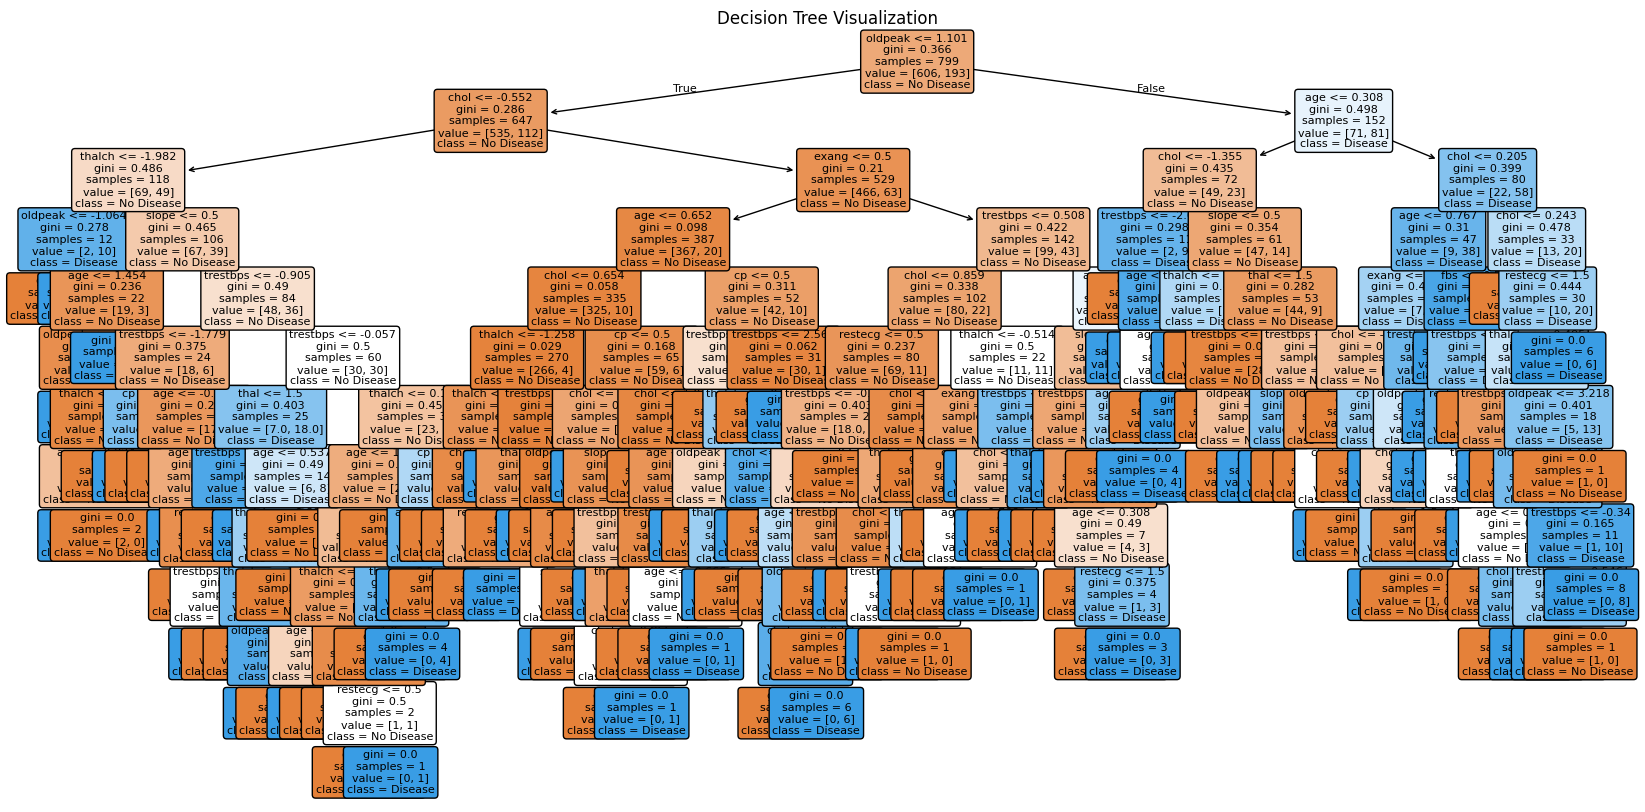

In [64]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV

### Define the parameter grid for tuning

In [66]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # splitting criteria
    'max_depth': [2, 4, 6, 8, 10, None],           # controls tree depth
    'min_samples_split': [2, 5, 10],               # min samples to split a node
    'min_samples_leaf': [1, 2, 4]                  # min samples in a leaf node
}

### Initialize GridSearchCV

In [67]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # evaluate based on accuracy
    n_jobs=-1,              # use all CPU cores
    verbose=1               # show progress
)

### Fit GridSearchCV

In [68]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


### Get best parameters and model

In [69]:
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

In [70]:
best_params


{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [71]:
best_dt_model 

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluate the tuned model

In [73]:
y_pred_best = best_dt_model.predict(X_test)
y_pred_best

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [74]:
print("\n Tuned Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("Precision:", round(precision_score(y_test, y_pred_best), 4))
print("Recall:", round(recall_score(y_test, y_pred_best), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_best), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred_best), 4))


 Tuned Model Performance:
Accuracy: 0.78
Precision: 0.8182
Recall: 0.1765
F1 Score: 0.2903
ROC AUC: 0.5815


### Confusion Matrix for tuned model

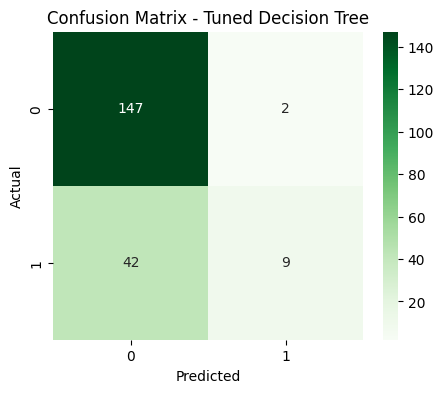

In [75]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Visualize the tuned tree

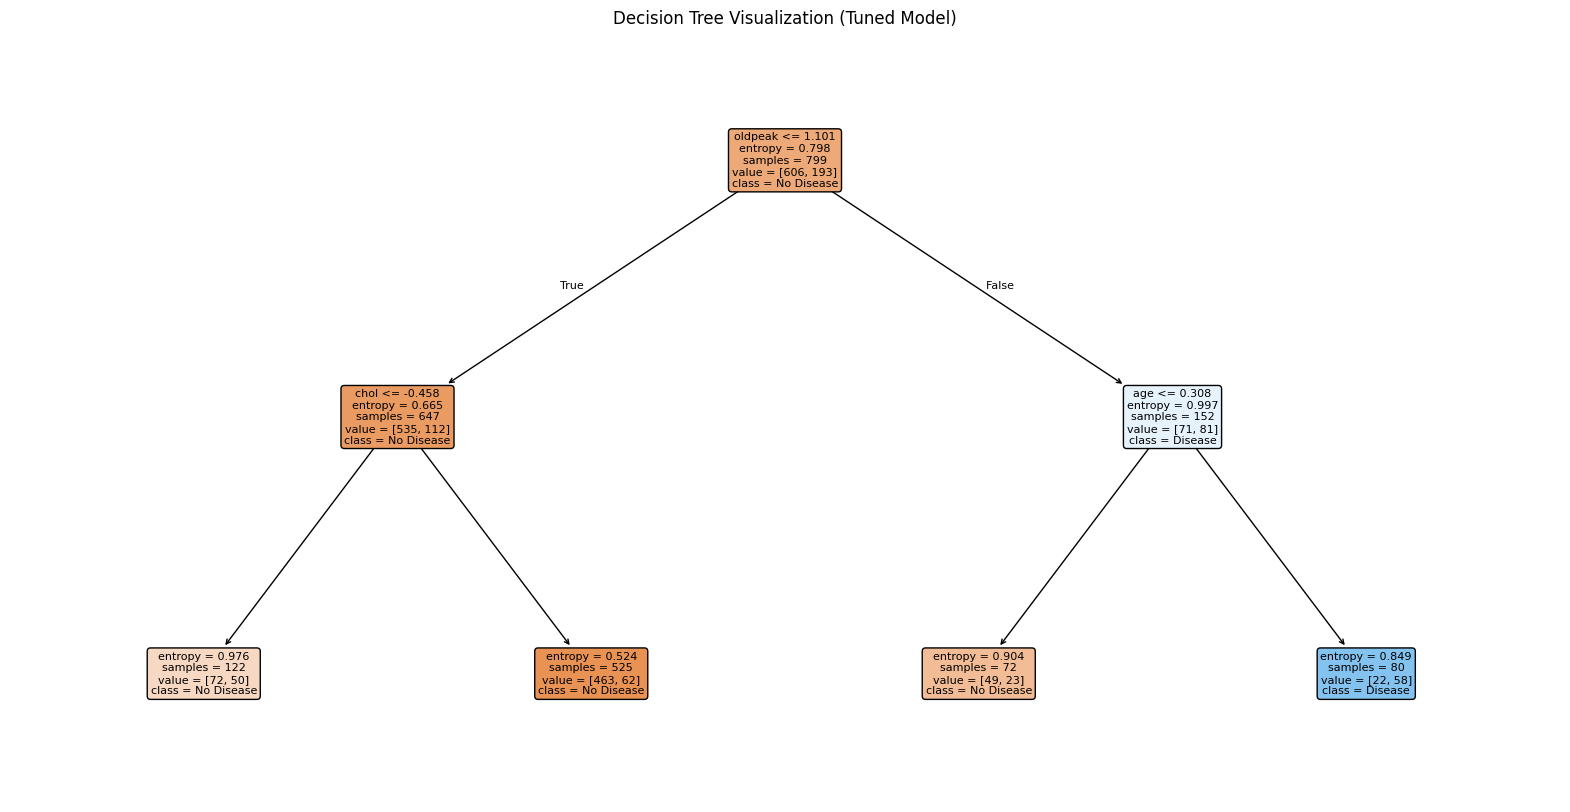

In [76]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization (Tuned Model)")
plt.show()

# 6. Model Evaluation and Analysis:

### Make predictions

In [77]:
y_pred_final = best_dt_model.predict(X_test)

In [78]:
y_pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Evaluation Metrics

In [79]:
print("\n Final Model Evaluation Metrics:")
print("Accuracy :", round(accuracy_score(y_test, y_pred_final), 4))
print("Precision:", round(precision_score(y_test, y_pred_final), 4))
print("Recall   :", round(recall_score(y_test, y_pred_final), 4))
print("F1 Score :", round(f1_score(y_test, y_pred_final), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_final), 4))


 Final Model Evaluation Metrics:
Accuracy : 0.78
Precision: 0.8182
Recall   : 0.1765
F1 Score : 0.2903
ROC AUC  : 0.5815


In [80]:
classification_report(y_test, y_pred_final)

'              precision    recall  f1-score   support\n\n           0       0.78      0.99      0.87       149\n           1       0.82      0.18      0.29        51\n\n    accuracy                           0.78       200\n   macro avg       0.80      0.58      0.58       200\nweighted avg       0.79      0.78      0.72       200\n'

### Confusion Matrix

In [ ]:
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature Importance

In [81]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🌿 Top Important Features:")
print(importances.head())


🌿 Top Important Features:
   Feature  Importance
9  oldpeak    0.505192
4     chol    0.326281
0      age    0.168527
1      sex    0.000000
2       cp    0.000000


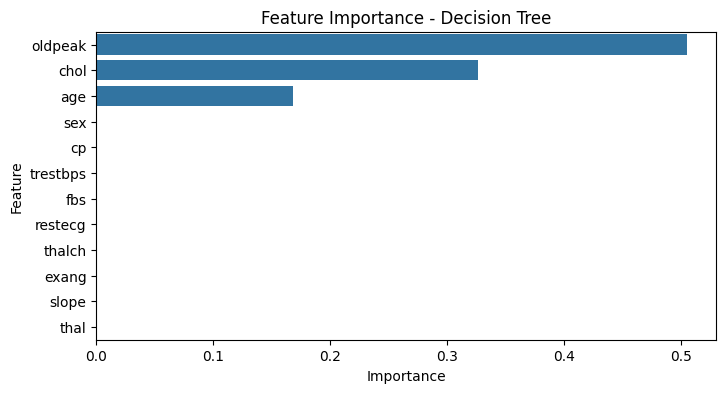

In [82]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance - Decision Tree")
plt.show()


### Visualize ROC Curve

In [84]:
from sklearn.metrics import roc_curve

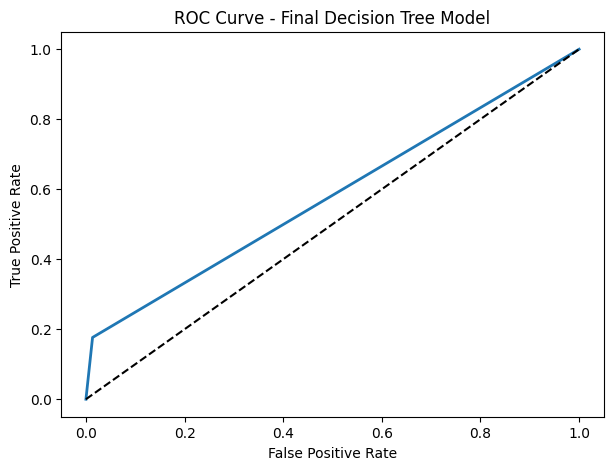

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Final Decision Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()